<a href="https://colab.research.google.com/github/pharringtonp19/housing-and-homelessness/blob/main/notebooks/Supply_Elasticity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Libraries**

In [48]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
from functools import partial
import optax

### **Functions**

In [38]:
def curve(price, shift=0, Q0=5, p0=5, elasticity=.2):
  return Q0 * (price / p0)**elasticity

### **Plot**

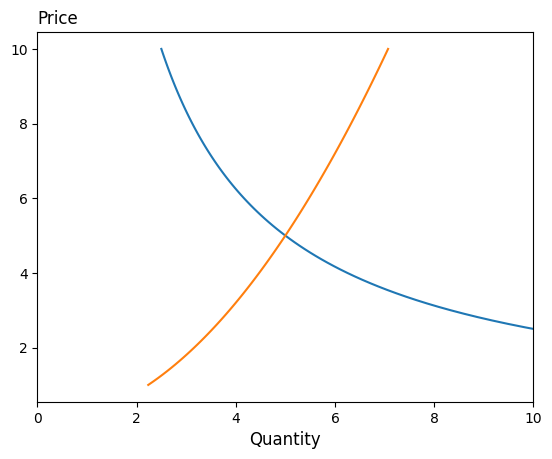

In [47]:
prices = jnp.linspace(1, 10, 100)
qs0 = partial(curve, elasticity=-1.)(prices)
plt.plot(qs0, prices)
qs1 = partial(curve, elasticity=0.5)(prices)
plt.plot(qs1, prices)
plt.xlim(0, 10)
plt.xlabel('Quantity', size=12)
plt.title('Price', size=12, loc='left')
plt.show()

In [63]:
def solve(e1, e2):

  def loss_fn(params):
    q, p = params
    a1 = q - curve(p, elasticity=e1)
    a2 = q - curve(p, elasticity=e2)
    return jnp.linalg.norm(jnp.array([a1, a2]))

  value_and_grad = jax.value_and_grad(loss_fn)
  optimizer = optax.lbfgs(memory_size=10)
  params = jnp.array([3.0, 3.0])
  opt_state = optimizer.init(params)

  for _ in range(10):
    value, grad = value_and_grad(params)
    updates, opt_state = optimizer.update(grad, opt_state, params=params, value=value, grad=grad, value_fn=loss_fn)
    params = optax.apply_updates(params, updates)
    if jnp.linalg.norm(params) < 1e-5:
      break

  return params

In [64]:
solve(1.0, -0.5)

Array([4.9999666, 4.9999967], dtype=float32)